C:\Users\tbakk\AppData\Local\Temp/ipykernel_9428/737253101.py:96: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot1_loss[i].set_3d_properties(np.array([y_train[i, 0], model.f(x_train[i, :])]))


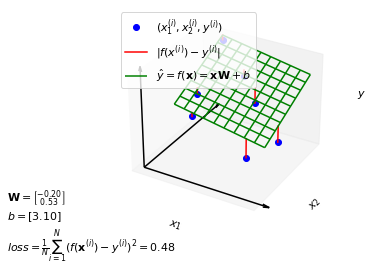

In [63]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from mpl_toolkits.mplot3d import axes3d, art3d

matplotlib.rcParams.update({'font.size': 11})

W_init = np.array([[-0.2], [0.53]])
b_init = np.array([[3.1]])


class LinearRegressionModel:
    def __init__(self, W=W_init.copy(), b=b_init.copy()):
        self.W = W
        self.b = b

    # predictor
    def f(self, x):
        return x @ self.W + self.b

    # Uses Mean Squared Error
    def loss(self, x, y):
        return np.mean(np.power(self.f(x) - y, 2))


model = LinearRegressionModel()

# observed/training input and output
data = np.array(pd.read_csv("day_length_weight.csv", 
                            names=['day', 'length', 'weight']))

x_in = data[1:, 1:].astype(np.float32)
y_in = data[1:, :1].astype(np.float32)

x_train = x_in[:800]
y_train = y_in[:800]

x_test = x_in[800:]
y_test = y_in[800:]

fig = plt.figure('Linear regression: 3D')

plot1 = fig.add_subplot(111, projection='3d')

plot1.plot(x_train[:, 0].squeeze(), x_train[:, 1].squeeze(), y_train[:, 0].squeeze(), 'o', label='$(x_1^{(i)},x_2^{(i)},y^{(i)})$', color='blue')

plot1_f = plot1.plot_wireframe(np.array([[]]), np.array([[]]), np.array([[]]), color='green', label='$\\hat y = f(\\mathbf{x}) = \\mathbf{xW}+b$')

plot1_info = fig.text(0.01, 0.03, '')

plot1_loss = []
for i in range(0, x_train.shape[0]):
    line, = plot1.plot([0, 0], [0, 0], [0, 0], color='red')
    plot1_loss.append(line)
    if i == 0:
        line.set_label('$|f(x^{(i)})-y^{(i)}|$')

plot1.set_xlabel('$x_1$')
plot1.set_ylabel('$x_2$')
plot1.set_zlabel('$y$')
plot1.legend(loc='upper left')
plot1.set_xticks([])
plot1.set_yticks([])
plot1.set_zticks([])
plot1.w_xaxis.line.set_lw(0)
plot1.w_yaxis.line.set_lw(0)
plot1.w_zaxis.line.set_lw(0)
plot1.quiver([0], [0], [0], [np.max(x_train[:, 0] + 1)], [0], [0], arrow_length_ratio=0.05, color='black')
plot1.quiver([0], [0], [0], [0], [np.max(x_train[:, 1] + 1)], [0], arrow_length_ratio=0.05, color='black')
plot1.quiver([0], [0], [0], [0], [0], [np.max(y_train[:, 0] + 1)], arrow_length_ratio=0.05, color='black')


def update_figure(event=None):
    if (event is not None):
        if event.key == 'W':
            model.W[0, 0] += 0.01
        elif event.key == 'w':
            model.W[0, 0] -= 0.01
        elif event.key == 'E':
            model.W[1, 0] += 0.01
        elif event.key == 'e':
            model.W[1, 0] -= 0.01

        elif event.key == 'B':
            model.b[0, 0] += 0.05
        elif event.key == 'b':
            model.b[0, 0] -= 0.05

        elif event.key == 'c':
            model.W = W_init.copy()
            model.b = b_init.copy()

    global plot1_f
    plot1_f.remove()
    x1_grid, x2_grid = np.meshgrid(np.linspace(1, 6, 10), np.linspace(1, 4.5, 10))
    y_grid = np.empty([10, 10])
    for i in range(0, x1_grid.shape[0]):
        for j in range(0, x1_grid.shape[1]):
            y_grid[i, j] = model.f([[x1_grid[i, j], x2_grid[i, j]]])
    plot1_f = plot1.plot_wireframe(x1_grid, x2_grid, y_grid, color='green')

    for i in range(0, x_train.shape[0]):
        plot1_loss[i].set_data(np.array([x_train[i, 0], x_train[i, 0]]), np.array([x_train[i, 1], x_train[i, 1]]))
        plot1_loss[i].set_3d_properties(np.array([y_train[i, 0], model.f(x_train[i, :])]))

    plot1_info.set_text(
        '$\\mathbf{W}=\\left[ \\genfrac{}{}{0}{}{%.2f}{%.2f} \\right]$\n$b=[%.2f]$\n$loss = \\frac{1}{N}\\sum_{i=1}^{N}(f(\\mathbf{x}^{(i)}) - y^{(i)})^2 = %.2f$'
        % (model.W[0, 0], model.W[1, 0], model.b[0, 0], model.loss(x_train, y_train)))

    fig.canvas.draw()


update_figure()
fig.canvas.mpl_connect('key_press_event', update_figure)

plt.show()